<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Model Evaluation and Refinement**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, and try to refine your model's performance in predicting the price of a laptop, given the attribute values.


# Objectives

After completing this lab you will be able to:

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

<ipython-input-2-4b1dc37464fb>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [5]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Import the data set into a data frame.


In [7]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
#df = pd.read_csv(filepath, header=None)

Print the value of df.head(). 


In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [9]:
df.drop(['Unnamed:0', 'Unnamed:0.1'], axis=1, inplace=True)

<class 'KeyError'>: "['Unnamed:0', 'Unnamed:0.1'] not found in axis"

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [11]:
# Chia dataset thành biến x_data và y_data. 
# Ở đây y_data là cột Price còn x_data là tất cả các thuộc tính còn lại trong dataset.
y_data = df['Price']
x_data = df.drop('Price',axis=1)

<details><summary>Click here for the solution</summary>

```python
y_data = df['Price']
x_data = df.drop('Price',axis=1)
```

</details>


Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [12]:
# Bước 1: Chia dữ liệu thành tập huấn luyện và kiểm tra, với 10% dữ liệu dành cho test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=22)
print('No. of test samples: ', x_test.shape[0])
print('No. of train samples: ', x_train.shape[0])

No. of test samples:  24
No. of train samples:  214


<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
```

</details>


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [13]:
# Bước 2: Tạo mô hình hồi quy tuyến tính đơn với biến CPU_frequency. In ra hệ số R^2 trên cả tập huấn luyện và test.
lm = LinearRegression()
lm.fit(x_train[['CPU_frequency']],y_train)
train_score = lm.score(x_train[['CPU_frequency']],y_train)
test_score = lm.score(x_test[['CPU_frequency']],y_test)
print(train_score)
print(test_score)

0.13719480138235196
0.09934128598336078


<details><summary>Click here for the solution</summary>

```python
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))
```

</details>


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [14]:
# Extra Step: The length of x & y data column is not the same, so we cut to make y = x
y_data = y_data[:len(x_train)]

In [15]:
# Bước 3: Chạy cross-validation với 4 fold, rồi in giá trị trung bình và độ lệch chuẩn của điểm R²
score_cv = cross_val_score(lm,x_train[['CPU_frequency']],y_train,cv=4)
print('Mean value of R2 score is: ', score_cv.mean())
print('Std of R2 score is: ', score_cv.std())

Mean value of R2 score is:  0.09031584928429984
Std of R2 score is:  0.0871444691144139


<details><summary>Click here for the solution</summary>

```python
Rcross = cross_val_score(lre, x_train[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
```

</details>


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [16]:
# Extra Step: The length of x & y data column is not the same, so we make them even
x_data = x_data[:214]
y_data = y_data[:214]

In [17]:
# Chia lại tập dữ liệu thành huấn luyện và kiểm tra (lần này test là 5%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=33)
print('No of test samples: ',x_test.shape[0])
print('No of train samples: ',x_train.shape[0])

No of test samples:  107
No of train samples:  107


<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)
# fixing random_state to a fixed quantity helps maintain uniformity between multiple 
# executions of the code.
```

</details>


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


In [18]:
# Mục tiêu: Nhận biết điểm overfitting của mô hình với biến CPU_frequency. 
# Để làm được điều này, bạn cần tạo ra các đặc trưng đa thức (polynomial features) từ cấp độ 1 đến 5.
# Sau đó, tính điểm R² tương ứng với từng cấp bậc và lưu vào một danh sách (list).

# Cách thực hiện: Tạo list r2, tạo list order, 
# for loop (Tạo đối tượng PF vs degs, fit_transform x_train, transform x_test,
# tạo đối tượng LR, fit vs x_train_poly, tính score vs x_test_poly, append score vào list r2)

r2_list = []
order = [1,2,3,4,5]

for n in order:
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train[['CPU_frequency']])
    x_test_poly = poly.transform(x_test[['CPU_frequency']])

    lr = LinearRegression()
    lr.fit(x_train_poly,y_train)
    
    r2_score = lr.score(x_test_poly,y_test)
    r2_list.append(r2_score)

<details><summary>Click here for the solution</summary>

```python
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
```

</details>


Plot the values of R^2 scores against the order. Note the point where the score drops.


Text(0.5, 1.0, 'R2 using test data')

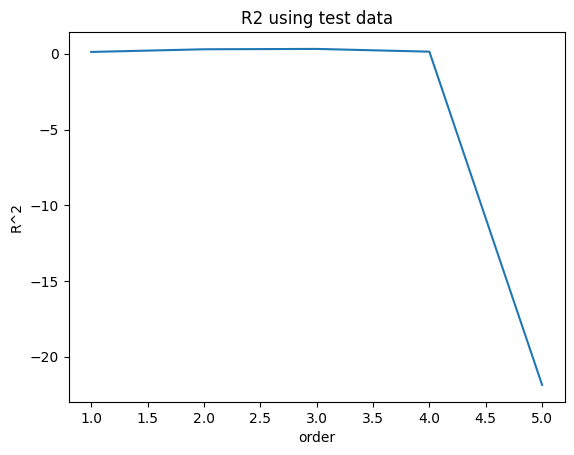

In [19]:
# Vẽ biểu đồ các giá trị điểm R² theo từng bậc (degree)
# Ghi chú lại điểm mà giá trị R² giảm xuống rõ rệt – đây có thể là dấu hiệu của overfitting.

plt.plot(order,r2_list)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R2 using test data')

In [20]:
# Tại vị trí degree = 4, R2 giảm rõ rệt
# At degree 4, the R2 score dropped dramatically

<details><summary>Click here for the solution</summary>

```python
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
```

</details>


# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [21]:
# Bây giờ bạn có nhiều biến đầu vào hơn như: CPU_frequency, RAM_GB, Storage_GB_SSD, CPU_core, OS, GPU, Category.
# Hãy tạo mô hình đa thức (polynomial) sử dụng tất cả các biến này với bậc = 2 (degree = 2). 
# Đồng thời tạo tập huấn luyện và kiểm tra cho các biến này.

poly1 = PolynomialFeatures(degree=2)
x_train_poly1 = poly1.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])
x_test_poly1 = poly1.transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

<details><summary>Click here for the solution</summary>

```python
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
```

</details>


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [22]:
# Yêu cầu: Tạo mô hình Ridge Regression và đánh giá nó với các giá trị alpha từ 0.001 đến 1.0, tăng dần 0.001 mỗi lần.
# Lưu lại danh sách điểm R² trên cả tập huấn luyện và kiểm tra.

# Cách thực hiện: Tạo DS test, tạo DS train, tạo mảng alpha theo y/c, tạo thanh tiến trình (pbar) theo alpha
# for loop (Tạo đối tượng ridge, fit ridge vs x_train_poly, tính cả score x_train/test_poly để biết tình trạng học, 
# cập nhật pbar hiển thị thêm Test/Train Score, append scores vào lists tương ứng

test_list = []
train_list = []
Alpha = np.arange(0.001, 1.0, 0.001) # Nên sd Alpha hoặc alpha_list cho mảng (alpha hoặc a cho 1 gtri alpha trong loop)
pbar = tqdm (Alpha)

for a in pbar:
    rm = Ridge(alpha=a)
    rm.fit(x_train_poly, y_train)
    test_score = rm.score(x_test_poly,y_test)
    train_score = rm.score(x_train_poly,y_train)
    pbar.set_postfix({'Test Score': test_score,'Train Score': train_score})
    test_list.append(test_score)
    train_list.append(train_score)

<ipython-input-22-3bdcadb7b378>:11: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  pbar = tqdm (Alpha)
100%|██████████| 999/999 [00:22<00:00, 45.08it/s, Test Score=0.219, Train Score=0.206]


<details><summary>Click here for the solution</summary>

```python
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
```

</details>


Plot the R^2 values for training and testing sets with respect to the value of alpha


(0.0, 1.0)

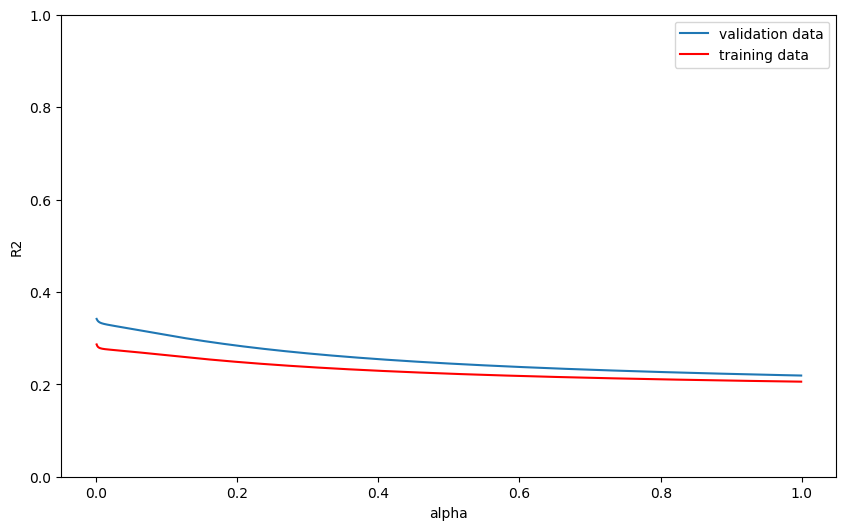

In [23]:
# Vẽ biểu đồ điểm R² theo các giá trị alpha cho cả training và testing set
plt.figure(figsize=(10,6))
plt.plot(Alpha, test_list, label='validation data')
plt.plot(Alpha, train_list, 'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend()
plt.ylim(0,1)

<details><summary>Click here for the solution</summary>

```python
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
```

</details>


# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [24]:
x_train = x_train.select_dtypes(include=['float64', 'int64'])

In [25]:
# Yêu cầu: Sử dụng dữ liệu thô và tập các biến đầu vào giống như phần trên, 
# dùng GridSearchCV để tìm ra giá trị alpha tối ưu cho Ridge Regression.

# Cách thực hiện: Tạo models StandardScaler & Ridge = Pipeline, tạo tập gtri hyperparameter sẽ thử,
# tạo model GridSearchCV, fit model, best model (estimator), best alpha (params)

# This and the 2 below cell's codes, are merged in this cell, for better look

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
models = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid = {
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
grid1 = GridSearchCV(models,param_grid,cv=4,scoring='r2') # mặc định là r2 nên khỏi ghi cũng được
grid1.fit(x_train,y_train)
BestRR = grid1.best_estimator_
BestParams = grid1.best_params_['ridge__alpha'] # best_params_ là từ điển, ko phải hàm
print('Best alpha: ', BestParams)

##### gõ lại code 1-2 lần + xuất tài liệu là xong lab này

Best alpha:  10



<details><summary>Click here for the solution</summary>

```python
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]
```

</details>


Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [26]:
# already did in the above cell

<details><summary>Click here for the solution</summary>

```python
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
```
</details>


Fit the Grid Search to the training data.


<details><summary>Click here for the solution</summary>

```python
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
```
</details>


Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [27]:
# already did in the above cell

<details><summary>Click here for the solution</summary>

```python
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))
```
</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
